# Artificial Neural Network
## Implementation of Perceptron Model to realize AND, OR, NAND, NOR and XOR gates

In [20]:
# Importing libs
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 8)

from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

### Define logic Gates functions 

In [13]:
# Logical OR
def _or(X):
    return int(np.any(X))

# Logical AND
def _and(X):
    return int(np.all(X))

# Logical NAND
def _nand(X):
    return int(not(np.all(X)))

# Logical NOR
def _nor(X):
    return int(not(np.any(X)))

# Logical XOR
def _xor(X):
    t = X[0]
    for i in range(1, len(X)):
        t = t ^ X[i]
    return t                    
    

### Define activation function $hardlim()$

In [14]:
# define the activation function
def hardlim(x_input, weight):
    res = np.dot(x_input, weight)
    return 1 if res >= 0 else 0 

### Generate dataset 

In [34]:
# Generate Dataset
# Dataset consists of (150x2) of zeros and ones
dim = 2
dataset = np.random.randint(0, 2, (100, dim))
# Manually add "all 1's" sequences to get more balanced dataset  
dataset = np.concatenate((dataset, np.ones((50, dim), dtype=int)))
# Shuffle the dataset
np.random.shuffle(dataset)

### Generate class Label upon each Logic Gates 

In [35]:
y_and = np.apply_along_axis(_and, 1, dataset)
y_or = np.apply_along_axis(_or, 1, dataset)
y_nand = np.apply_along_axis(_nand, 1, dataset)
y_nor = np.apply_along_axis(_nor, 1, dataset)
y_xor = np.apply_along_axis(_xor, 1, dataset)

### Adding Gaussian noise to the dataset 

In [36]:
## Add Gaussian Noise to Dataset
dataset = dataset + np.random.normal(0, 0.05, size=dataset.shape)

## Add bias to dataset (an extra column of 1's in the beginning)
dataset = np.hstack((np.ones((dataset.shape[0], 1)), dataset))

### Plotting datasets

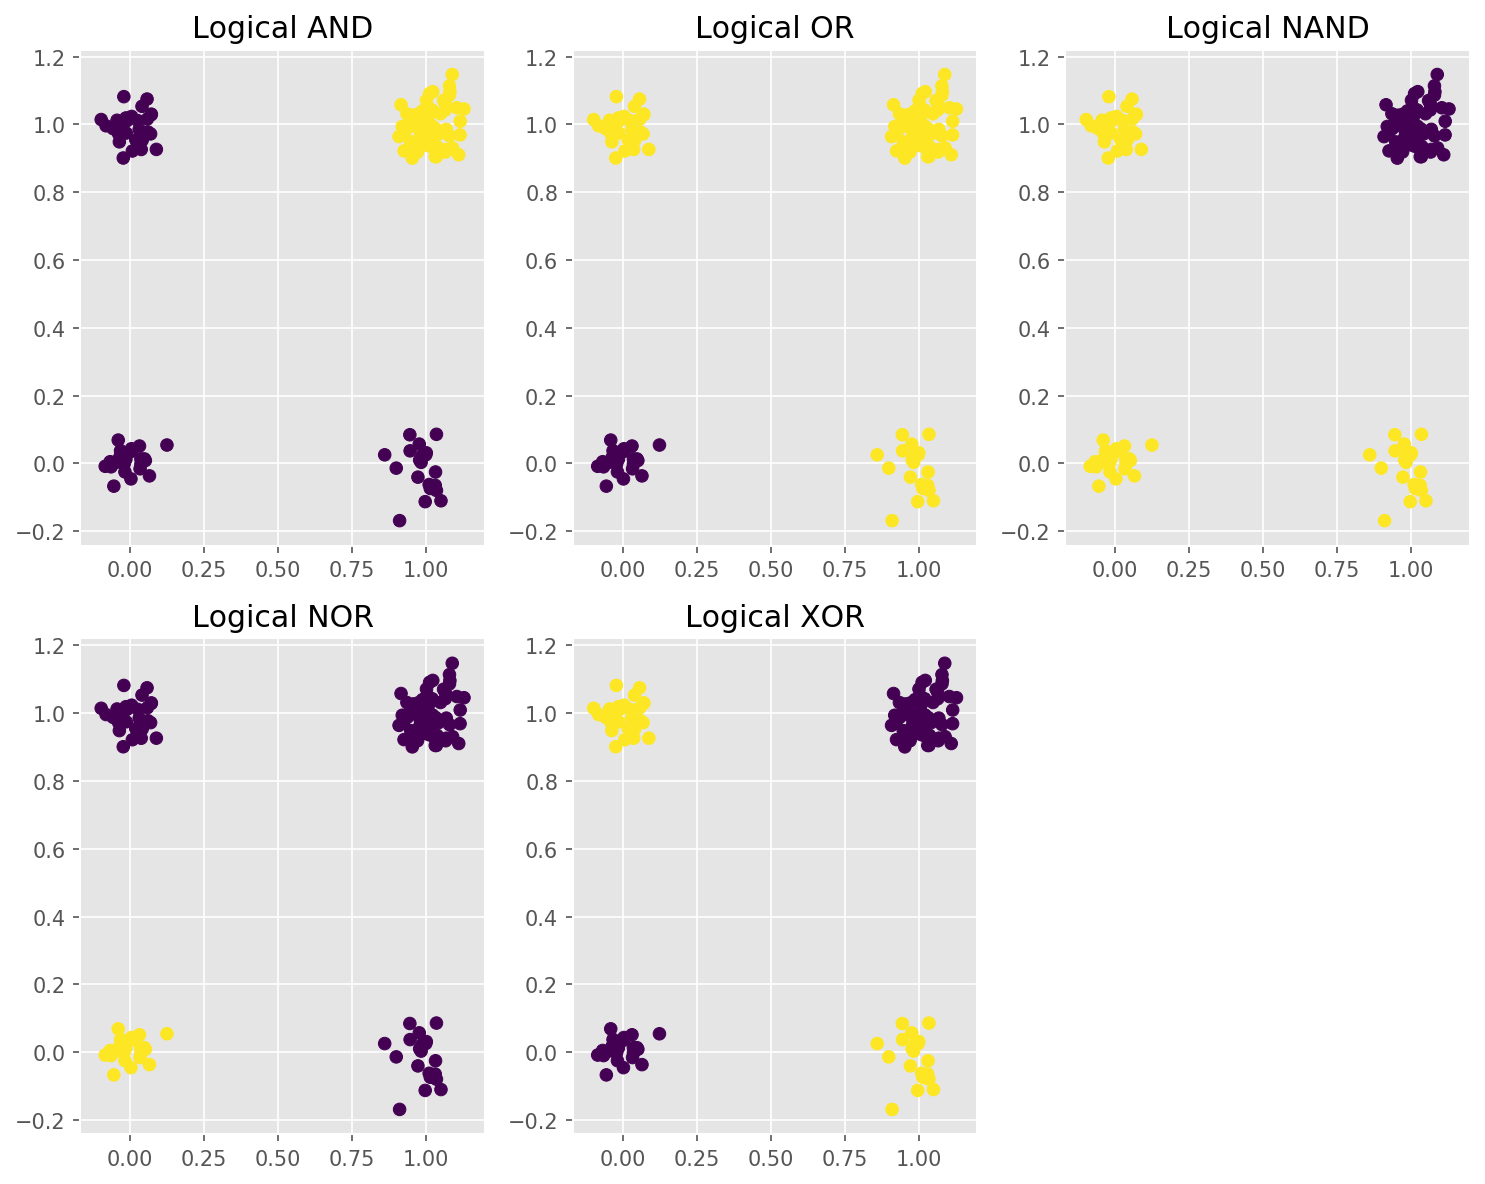

In [37]:
## Plot Points before adding bias
plt.figure(dpi=150)

# AND
plt.subplot(2,3,1)
plt.scatter(dataset[:,1], dataset[:,2], c=y_and)
plt.title("Logical AND")

# OR
plt.subplot(2,3,2)
plt.scatter(dataset[:,1], dataset[:,2], c=y_or)
plt.title("Logical OR")

# NAND
plt.subplot(2,3,3)
plt.scatter(dataset[:,1], dataset[:,2], c=y_nand)
plt.title("Logical NAND")

# NOR
plt.subplot(2,3,4)
plt.scatter(dataset[:,1], dataset[:,2], c=y_nor)
plt.title("Logical NOR")

# XOR
plt.subplot(2,3,5)
plt.scatter(dataset[:,1], dataset[:,2], c=y_xor)
plt.title("Logical XOR")

plt.tight_layout()
plt.show()